# Project 5: World Wide Products Inc
## Import Libraries
Import useful libraries and ML models

In [10]:
#libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib.dates import DateFormatter, WeekdayLocator, drange, RRuleLocator, YEARLY, rrulewrapper, MonthLocator
from sklearn import preprocessing
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#model
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore") 

## Loading the datasets and drop some unused features or duplicate features
Source: https://www.kaggle.com/felixzhao/productdemandforecasting

Drop Null row and convert date.

In [3]:
df_all = pd.read_csv("Data\\Historical Product Demand.csv")
df_all.dropna(inplace=True)
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all.head()

Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028 2012-07-27         100 
1  Product_0979    Whse_J     Category_028 2012-01-19         500 
2  Product_0979    Whse_J     Category_028 2012-02-03         500 
3  Product_0979    Whse_J     Category_028 2012-02-09         500 
4  Product_0979    Whse_J     Category_028 2012-03-02         500

## Observe the data
There are three main important sections that may useful for us to break up the whole data and do something with it.


### The first category is product code

In [4]:
print("No.Unique Product code:", df_all['Product_Code'].unique().size)
Product_Code = df_all.groupby(['Product_Code','Date','Order_Demand'])['Product_Code'].agg('count')
# Product_Code = df_all.groupby(['Product_Code','Date','Order_Demand'])['Product_Code'].sum()
Product_Code

No.Unique Product code: 2160


Product_Code  Date        Order_Demand
Product_0001  2011-12-16  200             1
              2011-12-20  100             1
              2012-01-03  200             1
                          800             1
              2012-01-04  200             1
                                         ..
Product_2172  2016-09-30  100             1
              2016-10-21  600             1
              2016-10-30  300             1
              2016-11-24  300             1
              2016-11-30  600             1
Name: Product_Code, Length: 915627, dtype: int64

By observing the data, we can preliminarily draw a conclusion that it is very inefficient to track and estimate 2160 independent products. We cannot effectively model every product. So we give up training through products. However, we can only choose one product and observe its time series forecasting.

### Time forecasting

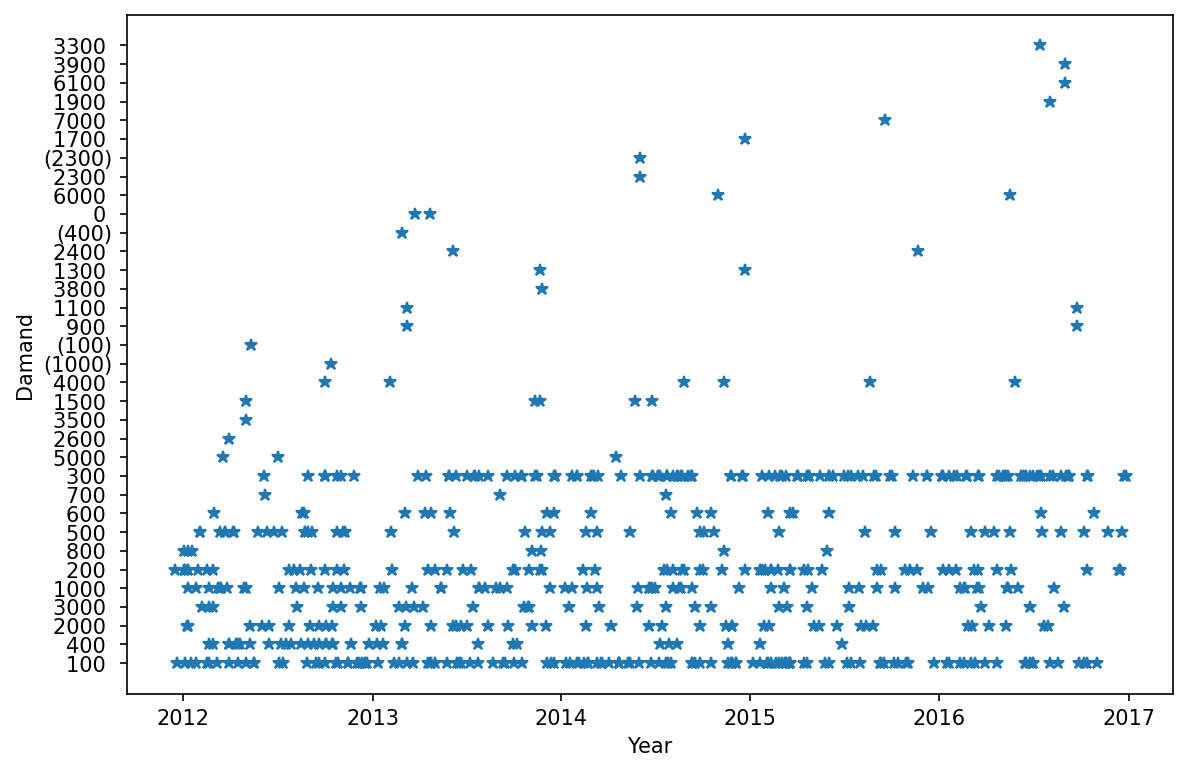

In [31]:
Product = df_all[df_all.Product_Code == 'Product_0001'].copy()
fig = pyplot.figure(figsize=(9,6),dpi=150)
pyplot.plot(Product['Date'],Product['Order_Demand'],'*')
pyplot.xlabel('Year')
pyplot.ylabel('Damand')
pyplot.show()

This is plot for product 1 from 2012 to 2017

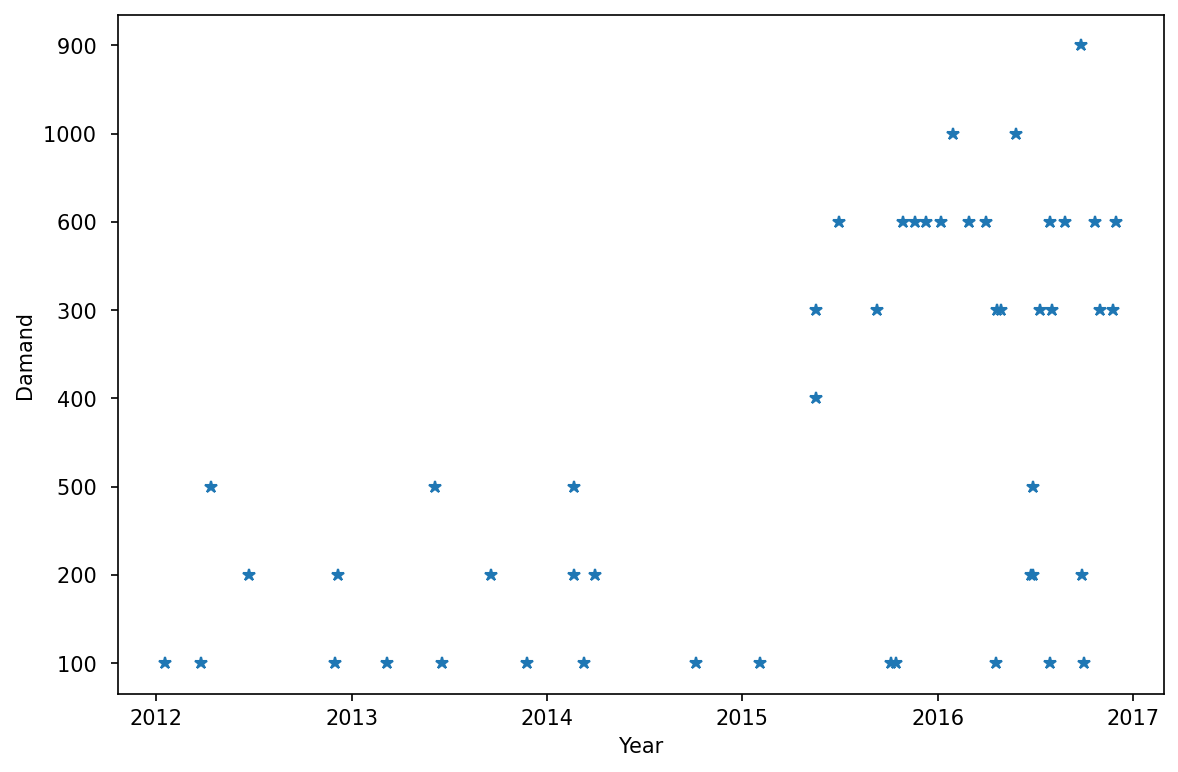

In [32]:
Product = df_all[df_all.Product_Code == 'Product_2172'].copy()
fig = pyplot.figure(figsize=(9,6),dpi=150)
pyplot.plot(Product['Date'],Product['Order_Demand'],'*')
pyplot.xlabel('Year')
pyplot.ylabel('Damand')
pyplot.show()

This is plot for product 2172 from 2012 to 2017. It is difficult to find obvious patterns through the timeline。

### The second category is warehouse

In [5]:
print("No.Unique Warehouse:", df_all['Warehouse'].unique().size)
Warehouse = df_all.groupby(['Warehouse','Date','Order_Demand'])['Warehouse'].agg('count')
Warehouse

No.Unique Warehouse: 4


Warehouse  Date        Order_Demand
Whse_A     2011-01-08  2               1
           2011-05-31  108             1
           2011-11-04  (100)           1
                       (400)           1
           2011-11-18  1               1
                                      ..
Whse_S     2016-12-30  30000           1
                       48000           1
                       80              1
           2017-01-02  70              1
           2017-01-03  200             1
Name: Warehouse, Length: 224991, dtype: int64

We observe that if we analyze according to the warehouse, we will only have 4 categories in total, the data is neatly arranged and very suitable for observation and training. Therefore, we further use the time forecasting model to observe the changes in sales of different stores over time.

### Time Forecasting

array([<AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>], dtype=object)

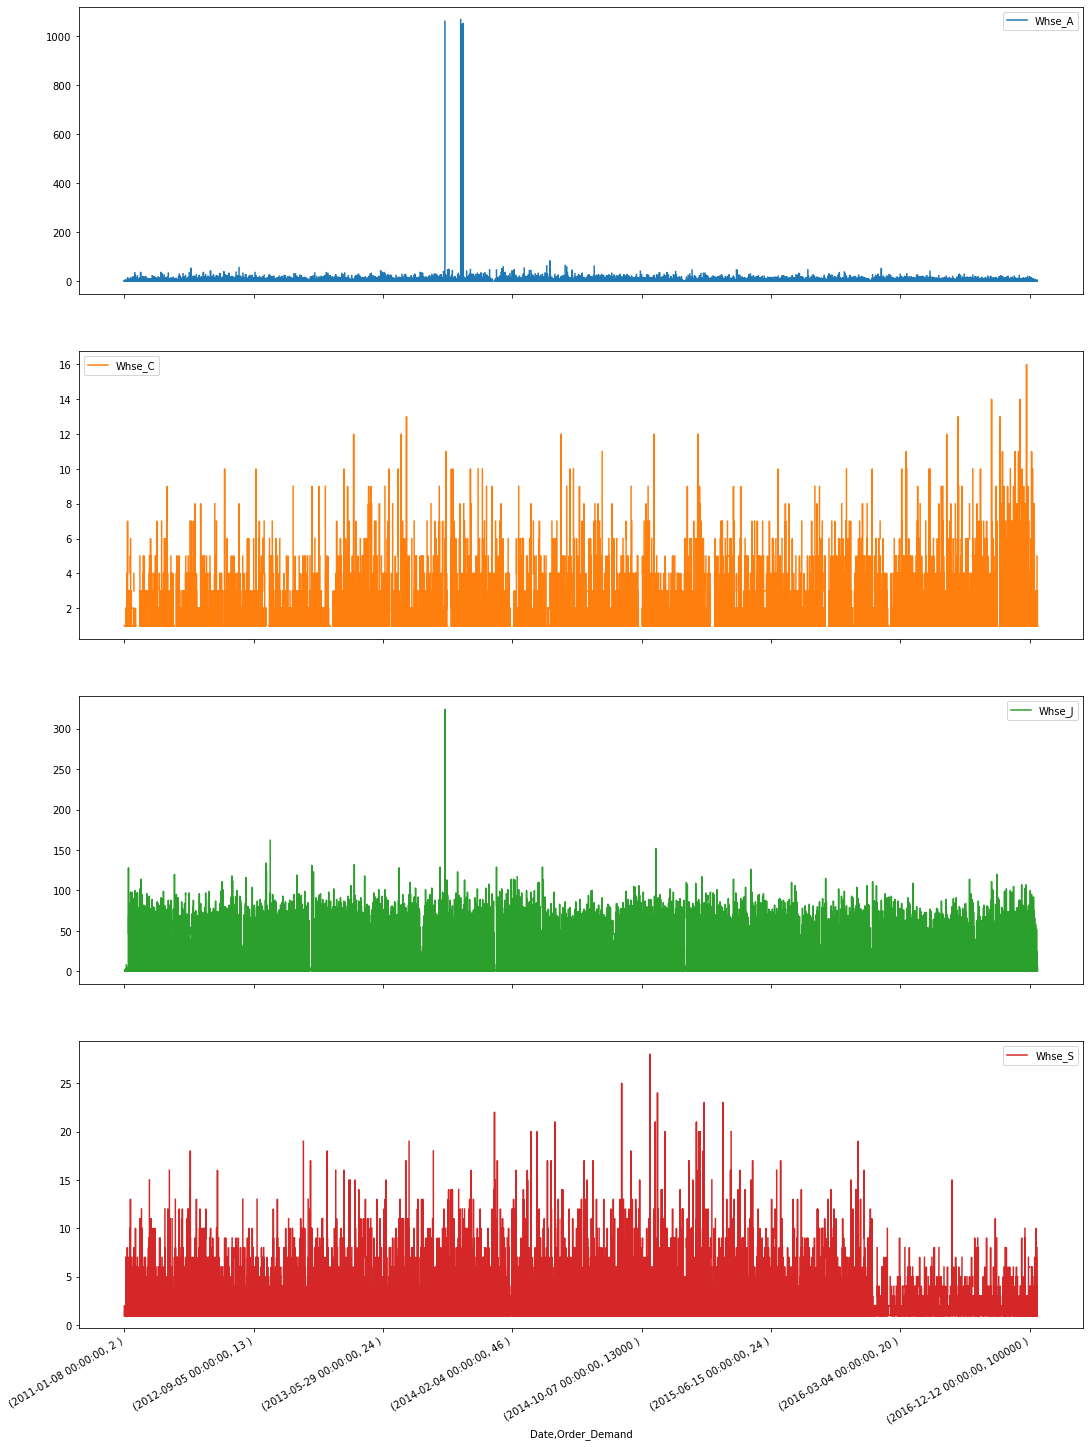

In [6]:
Warehouse.unstack('Warehouse').plot.line(subplots=True, figsize=(18,27))

### The third category is product category

In [7]:
print("No.Unique Product category:", df_all['Product_Category'].unique().size)
Product_Category = df_all.groupby(['Product_Category','Date','Order_Demand'])['Product_Category'].agg('count')
# Product_Category = df_all.loc[:,['Product_Category','Date','Order_Demand']]
Product_Category

No.Unique Product category: 33


Product_Category  Date        Order_Demand
Category_001      2011-09-27  23              1
                              5               1
                  2011-12-13  1               1
                              40              1
                  2011-12-16  10              1
                                             ..
Category_033      2016-12-22  10000           1
                              100000          1
                              30000           1
                              50000           1
                  2016-12-26  10000           1
Name: Product_Category, Length: 324349, dtype: int64

This direction is also a very good approach, we only have 32 categories of our product.

### Time Forecasting

array([<AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:xlabel='Date,Order_Demand'>,
       <AxesSubplot:

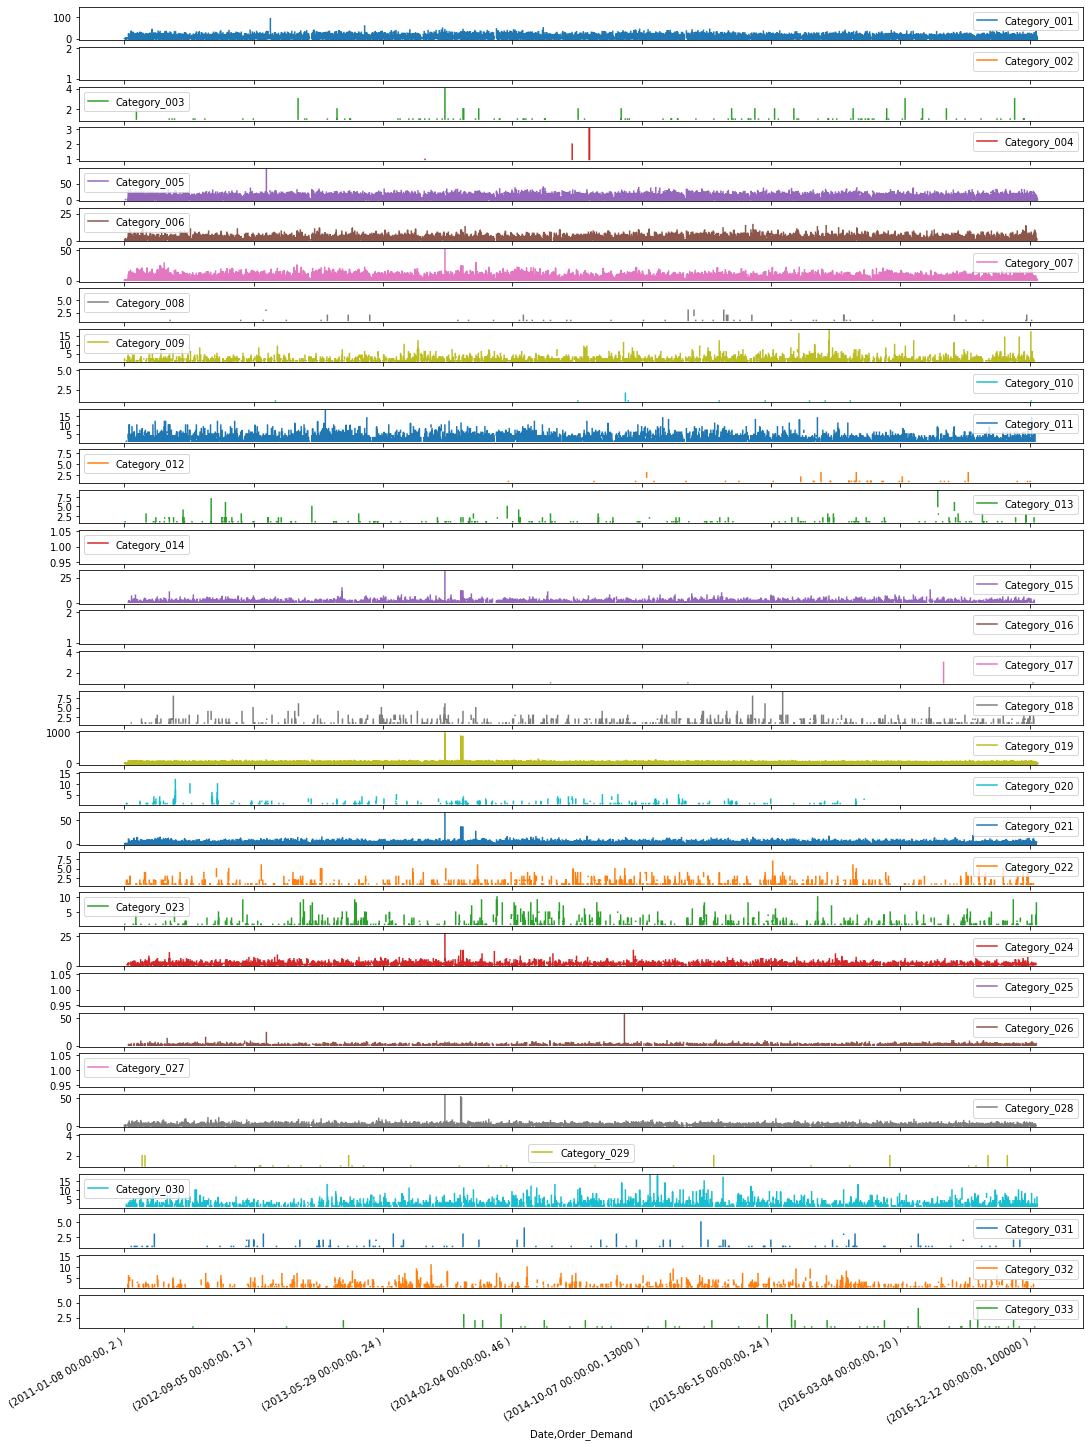

In [8]:
Product_Category.unstack('Product_Category').plot.line(subplots=True, figsize=(18,27))

## Conclusion
We are using different features and plot them into time series forecast to observe the trend of our product, product category and warehouse. 
In general, the use of time series forecasting for data observation is very inaccurate. Although we got 40MB of data this time, they have few details. It may be possible to determine the relationship between seasons and products based on approximate sales. However, it is still very inaccurate to predict how many items will be sold in the first few days. This project is very interesting. I think if I can select one or two products to observe separately, the trend will be more obvious.